In [1]:
!pip install rasterio

     |████████████████████████████████| 21.2 MB 9.8 MB/s eta 0:00:01


In [2]:
import rasterio
from rasterio import plot
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
dirpath = "dixie_fire_psscene4band_analytic_sr_udm2/files"
out_fp = "dixie_fire_mosaic.tif"
search_criteria = "*SR_clip.tif"
q = os.path.join(dirpath, search_criteria)
print(q)

dixie_fire_psscene4band_analytic_sr_udm2/files/*.tif


In [10]:
dem_fps = glob.glob(q)
dem_fps

['dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182816_103c_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182804_103c_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182818_103c_3B_udm2_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_185215_89_2402_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183256_1005_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183304_1005_3B_udm2_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183250_1005_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_185000_75_2416_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_180707_38_2206_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183259_1005_3B_udm2_clip.tif',
 'dixie_fi

In [11]:
src_files_to_mosaic = []
problem_files = []
for fp in dem_fps:
    try:
        src_files_to_mosaic.append(rasterio.open(fp))
    except:
        problem_files.append(fp)
        
src_files_to_mosaic

[<open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182816_103c_3B_AnalyticMS_DN_udm_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182804_103c_3B_AnalyticMS_DN_udm_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_185215_89_2402_3B_AnalyticMS_DN_udm_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183256_1005_3B_AnalyticMS_DN_udm_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183304_1005_3B_udm2_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183250_1005_3B_AnalyticMS_DN_udm_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_185000_75_2416_3B_AnalyticMS_DN_udm_clip.tif' mode='r'>,
 <open DatasetReader name='dixie_fire_psscene4ba

In [12]:
problem_files

['dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182818_103c_3B_udm2_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182800_103c_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_182819_103c_3B_AnalyticMS_DN_udm_clip.tif',
 'dixie_fire_psscene4band_analytic_sr_udm2/files/20211015_183253_1005_3B_AnalyticMS_DN_udm_clip.tif']

In [13]:
from rasterio.merge import merge

In [14]:
mosaic, out_trans = merge(src_files_to_mosaic)

DatasetIOShapeError: Dataset indexes and destination buffer are mismatched

In [1]:
rasterio.plot.show(mosaic, cmap='terrain')

NameError: name 'rasterio' is not defined

In [2]:
SR_tif = rasterio.open('dixie_fire_psscene4band_analytic_sr_udm2/files/20210831_180519_39_2420_3B_AnalyticMS_SR_clip.tif')

In [3]:
SR_tif.height

1506

In [4]:
SR_tif.width

1808

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


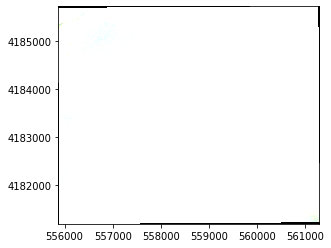

In [5]:
plot.show(SR_tif)

In [6]:
SR_tif.dtypes

('uint16', 'uint16', 'uint16', 'uint16')

In [7]:
SR_tif.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]')

In [8]:
SR_tif.transform

Affine(3.0, 0.0, 555867.0,
       0.0, -3.0, 4185720.0)

In [10]:
SR_tif.read(2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [14]:
red = SR_tif.read(3)
nir = SR_tif.read(4)

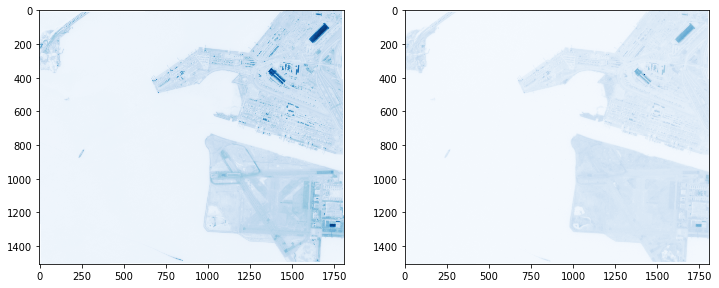

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.imshow(red, cmap='Blues')
ax2.imshow(nir, cmap='Blues')
#fig.tight_layout()

In [15]:
ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
)

ndvi

/Users/Jackie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
ndvi_image = rasterio.open('ndvi_image.tiff', 'w', driver='Gtiff', 
                           width=SR_tif.width, height=SR_tif.height, 
                          count=1, crs=SR_tif.crs, transform=SR_tif.transform,
                          dtype='float64')
ndvi_image.write(ndvi, 1)
ndvi_image.close()

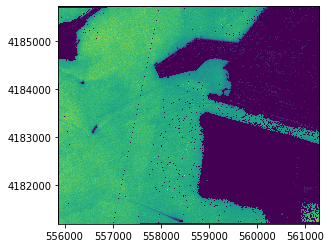

In [21]:
ndvi = rasterio.open('ndvi_image.tiff')
plot.show(ndvi)